<a href="https://colab.research.google.com/github/yamenetoo/ST/blob/main/Dr%20homai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1- p.d.f aproximation using polynomial method

In [67]:
set.seed(123)
n <- 1000
X1 <- rnorm(n, mean = 0, sd = 1)
X2 <- rnorm(n, mean = 0, sd = 1)
W <- runif(n)
Z <- W * X1 + (1 - W) * X2
head(data.frame(X1, X2, W, Z))

,X1,X2,W,Z
,<dbl>,<dbl>,<dbl>,<dbl>
1,-0.56047565,-0.99579872,0.3044642,-0.86325844
2,-0.23017749,-1.03995504,0.8328188,-0.36555709
3,1.55870831,-0.01798024,0.5936475,0.91801699
4,0.07050839,-0.13217513,0.8071966,0.03143033
5,0.12928774,-2.54934277,0.2940508,-1.76168939
6,1.71506499,1.04057346,0.1410852,1.13573424


The provided code generates a synthetic dataset with the following steps:

1. **Setting Seed for Reproducibility:**
   The  $ set.seed(123) $  ensures that the random number generation is reproducible, meaning that if you run the code again, you'll get the same set of random numbers.

2. **Generating Random Normal Variables:**
   - Two vectors, $ X_1 $ and $ X_2 $ , are created, each containing 1000 random numbers.
   - These random numbers are drawn from a normal distribution with a mean of 0 and a standard deviation of 1. These vectors represent independent and identically distributed (i.i.d.) random variables.

3. **Generating a Random Uniform Variable:**
   - A vector $ W $ is created with 1000 random numbers drawn from a uniform distribution in the interval $ (0, 1) $.

4. **Creating a Linear Combination Variable \(Z\):**
   - A new variable `Z` is generated by combining $ X_1 $  and  $ X_2 $  in a linear fashion, based on the values of $ W $. The formula for each observation is
   $$  Z = W \cdot X_1 + (1 - W) \cdot X_2. $$

   - Essentially, for each observation, it's a weighted sum of  $ X_1 $  and  $ X_2 $ , where the weights are determined by the corresponding values of  $ W $ .

The previous code simulates a scenario where there are two random variables,  $ X_1 $  and  $ X_2 $ , both following a normal distribution, and a third variable  $ W $  following a uniform distribution. The variable  $ Z $  is then created as a linear combination of  $ X_1 $  and  $ X_2 $  using the weights provided by  $ W $ .

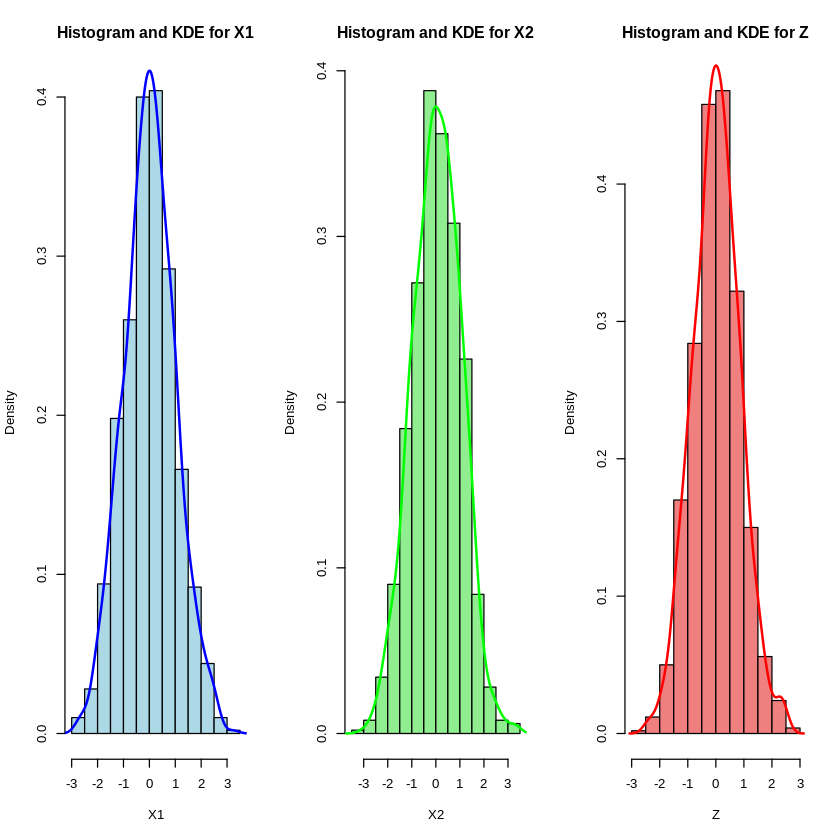

In [68]:
par(mfrow = c(1, 3))
# Histogram and KDE for X1

hist(X1, main = "Histogram and KDE for X1", col = "lightblue", border = "black", probability = TRUE)
lines(density(X1), col = "blue", lwd = 2)

# Histogram and KDE for X2
hist(X2, main = "Histogram and KDE for X2", col = "lightgreen", border = "black", probability = TRUE)
lines(density(X2), col = "green", lwd = 2)

# Histogram and KDE for Z
hist(Z, main = "Histogram and KDE for Z", col = "lightcoral", border = "black", probability = TRUE)
lines(density(Z), col = "red", lwd = 2)
par(mfrow = c(1, 1))

In [69]:
mu=function (r) mean(Z**r)

In [70]:
N= 10
a=-3;b=3
M=matrix(,N+1,N+1)
for( i in 1:(N+1))
{
  for (j in 1:(N+1))
  {
    q=j+i-1
    M[i,j]=(b^q-a^q)/q
  }
}
E=c()
for( i in 0:N) E=c(E,mu(i))
w=solve(M)%*%E

In [71]:
res=c()
x=seq(a,b,by=0.01)
for(i in x)
{
  v=c()
  for(j in 0:N) v[j+1]=i^j
  res=c(res,sum(w*v))
}
f_aproxmation=spline(x,res)


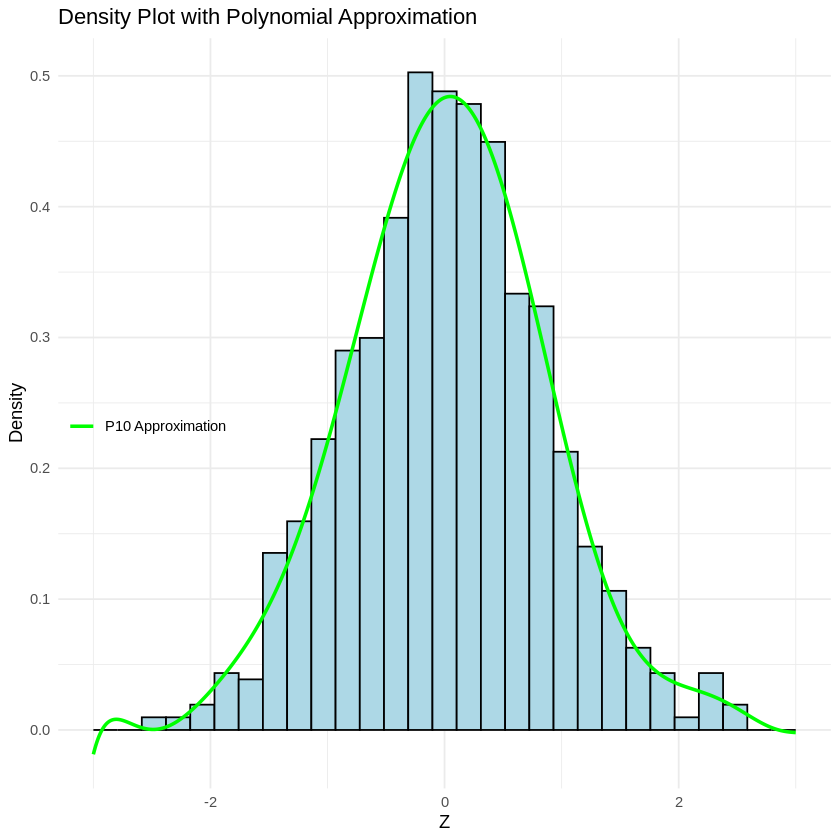

In [72]:
library(ggplot2)

ggplot() +
  geom_histogram(aes(x = Z, y = after_stat(density)), bins = 30, fill = "lightblue", color = "black") +
  geom_line(aes(x = f_aproxmation$x, y = f_aproxmation$y, color = "P10 Approximation"), linewidth = 1, linetype = "solid") +
  labs(title = "Density Plot with Polynomial Approximation",x = "Z",y = "Density") +
  theme_minimal() +
  theme(legend.position = c(0, 0.5),legend.justification = c(0, 0.5)) +
  scale_color_manual(values = "green", name = "")


## 2- p.d.f aproximation using fitdist method

In [ ]:
#install.packages(c("fitdistrplus", "ggplot2"))
library(fitdistrplus)
fit_result <- fitdist(Z, "norm")
summary(fit_result)

mu <- fit_result$estimate[1]
sigma <- fit_result$estimate[2]

x_values <- seq(min(Z), max(Z), length.out = 100)
normal_pdf <- dnorm(x_values, mean = mu, sd = sigma)

The provided code is performing the following tasks in R:

1. **Install and Load Packages:**
   - The code attempts to install the packages `"fitdistrplus"` and `"ggplot2"`. This is commented out (indicated by `#` at the beginning of the line), so it won't be executed unless you uncomment it.
   - The `library(fitdistrplus)` line loads the `fitdistrplus` package, which is used for fitting probability distributions to data.

2. **Fit Normal Distribution to Data:**
   - `fit_result <- fitdist(Z, "norm")`: This line fits a normal distribution to the data in the vector `Z` using the `fitdist` function from the `fitdistrplus` package. The result is stored in the variable `fit_result`.
   - `summary(fit_result)`: This prints a summary of the fitted distribution, including parameter estimates (mean and standard deviation).

3. **Extract Parameter Estimates:**
   - `mu <- fit_result$estimate[1]`: Extracts the estimated mean (location parameter) from the fit result.
   - `sigma <- fit_result$estimate[2]`: Extracts the estimated standard deviation (scale parameter) from the fit result.

4. **Generate Normal PDF for Visualization:**
   - `x_values <- seq(min(Z), max(Z), length.out = 100)`: Creates a sequence of 100 values ranging from the minimum to the maximum of the data in `Z`.
   - `normal_pdf <- dnorm(x_values, mean = mu, sd = sigma)`: Computes the probability density function (PDF) values for a normal distribution with the estimated mean (`mu`) and standard deviation (`sigma`) at the specified `x_values`.

This code essentially fits a normal distribution to the data in `Z` and then generates a normal PDF based on the estimated parameters for visualization. Note that it assumes `Z` follows a normal distribution. If you want to check how well the data fits a normal distribution, you might want to consider additional diagnostic tools or goodness-of-fit tests.

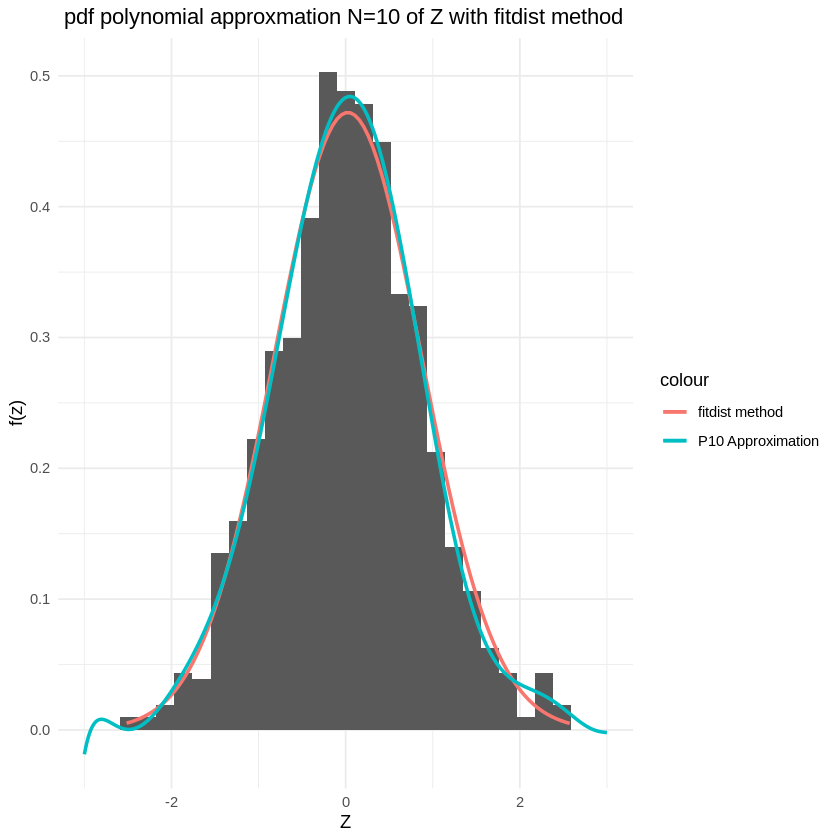

In [73]:
ggplot() +
geom_histogram(aes(x = Z, y = after_stat(density)), bins = 30) +
geom_line(aes(x = x_values, y = normal_pdf, color = "fitdist method"), linewidth = 1) +
  geom_line(aes(x = f_aproxmation$x, y = f_aproxmation$y, color = "P10 Approximation"), linewidth = 1, linetype = "solid") +
labs(title =            " pdf polynomial approxmation N=10 of Z with fitdist method ",x = "Z",y = "f(z)") +
theme_minimal()

##3- p.d.f aproximation usingTheoretical discussion

<div style="font-size: 16px; line-height: 1.6;">

Let $X_1$ and $X_2$ have independent standard normal distributions, and let $W$ be a uniform random variable on the interval $[0, 1]$.

The distribution of $$ Z = W \cdot X_1 + (1-W) \cdot X_2\ $$ can be determined by examining the properties of linear combinations of normal and uniform random variables.

<ol>
  <li><strong>Expectation (Mean):</strong></li>
  \begin{align*}
  \text{E}(Z) &= \text{E}(W \cdot X_1 + (1-W) \cdot X_2) \\
  &= \text{E}(W) \cdot \text{E}(X_1) + (1 - \text{E}(W)) \cdot \text{E}(X_2) \\
  &= \frac{1}{2} \cdot 0 + \frac{1}{2} \cdot 0 = 0
  \end{align*}

  <li><strong>Variance:</strong></li>
  \begin{align*}
  \text{Var}(Z) &= \text{Var}(W \cdot X_1 + (1-W) \cdot X_2) \\
  &= \text{Var}(W \cdot X_1) + \text{Var}((1-W) \cdot X_2) + 2 \cdot \text{Cov}(W \cdot X_1, (1-W) \cdot X_2) \\
  &= \text{E}(W^2) \cdot \text{Var}(X_1) + \text{E}((1-W)^2) \cdot \text{Var}(X_2) \\
  &= \frac{1}{3} \cdot 1 + \frac{1}{3} \cdot 1 = \frac{2}{3}
  \end{align*}
</ol>

So, the distribution   of   $$Z = W \cdot X_1 + (1-W) \cdot X_2 $$ is a normal distribution with mean $ 0 $ and variance ${2}/{3}$.
</div>


In [64]:
x_values <- seq(min(Z), max(Z), length.out = 100)
Exact_normal_pdf <- dnorm(x_values, mean =0, sd =2/3)

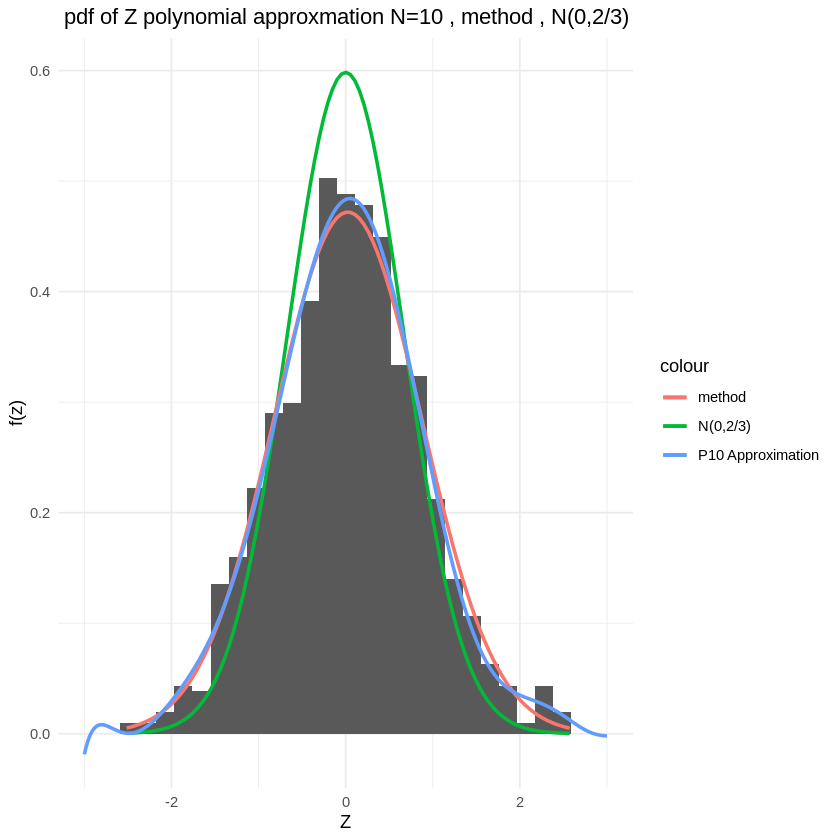

In [74]:
ggplot() +
geom_histogram(aes(x = Z, y = after_stat(density)), bins = 30) +
geom_line(aes(x = x_values, y = Exact_normal_pdf, color = "N(0,2/3)"), linewidth = 1) +
geom_line(aes(x = x_values, y = normal_pdf, color = "method"), linewidth = 1) +
geom_line(aes(x = f_aproxmation$x, y = f_aproxmation$y, color = "P10 Approximation"), linewidth = 1, linetype = "solid") +
labs(title =            " pdf of Z polynomial approxmation N=10 , method , N(0,2/3)  ",x = "Z",y = "f(z)") +
theme_minimal()